In [29]:
from datascience import *
import numpy as np

# Census

In [3]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [4]:
partial = full.select('SEX', 'AGE', 4, 8)
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [10]:
simple = partial.relabeled('POPESTIMATE2010','2010').relabeled('POPESTIMATE2014','2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [11]:
simple.set_format([2,3], NumberFormatter)

SEX,AGE,2010,2014
0,0,"3,951,330","3,948,350"
0,1,"3,957,888","3,962,123"
0,2,"4,090,862","3,957,772"
0,3,"4,111,920","4,005,190"
0,4,"4,077,552","4,003,448"
0,5,"4,064,653","4,004,858"
0,6,"4,073,013","4,134,352"
0,7,"4,043,047","4,154,000"
0,8,"4,025,604","4,119,524"
0,9,"4,125,415","4,106,832"


In [13]:
simple.sort('AGE', descending=True)
# need to go read the documentation! (back to slides)

SEX,AGE,2010,2014
2,999,"157,257,573","161,920,569"
1,999,"152,089,484","156,936,487"
0,999,"309,347,057","318,857,056"
2,100,"45,058","58,468"
1,100,"9,351","13,729"
0,100,"54,409","72,197"
2,99,"26,074","32,791"
1,99,"6,104","9,037"
0,99,"32,178","41,828"
2,98,"37,533","46,536"


In [15]:
no_999 = simple.where(1, are.below(999))
no_999

SEX,AGE,2010,2014
0,0,"3,951,330","3,948,350"
0,1,"3,957,888","3,962,123"
0,2,"4,090,862","3,957,772"
0,3,"4,111,920","4,005,190"
0,4,"4,077,552","4,003,448"
0,5,"4,064,653","4,004,858"
0,6,"4,073,013","4,134,352"
0,7,"4,043,047","4,154,000"
0,8,"4,025,604","4,119,524"
0,9,"4,125,415","4,106,832"


In [18]:
everyone = no_999.where('SEX',0).drop(0)
males = no_999.where('SEX', 1).drop(0)
females = no_999.where('SEX',2).drop(0)

In [19]:
males

AGE,2010,2014
0,"2,018,420","2,017,857"
1,"2,020,332","2,023,253"
2,"2,088,685","2,022,502"
3,"2,101,272","2,048,618"
4,"2,084,312","2,043,498"
5,"2,076,573","2,043,467"
6,"2,079,410","2,110,328"
7,"2,063,139","2,122,240"
8,"2,054,462","2,105,122"
9,"2,107,037","2,097,272"


In [20]:
females

AGE,2010,2014
0,"1,932,910","1,930,493"
1,"1,937,556","1,938,870"
2,"2,002,177","1,935,270"
3,"2,010,648","1,956,572"
4,"1,993,240","1,959,950"
5,"1,988,080","1,961,391"
6,"1,993,603","2,024,024"
7,"1,979,908","2,031,760"
8,"1,971,142","2,014,402"
9,"2,018,378","2,009,560"


In [21]:
females.sort(2,descending=True)

AGE,2010,2014
54,"2,196,798","2,331,961"
53,"2,268,457","2,316,131"
24,"2,082,209","2,301,237"
23,"2,066,126","2,298,701"
51,"2,289,164","2,283,261"
52,"2,283,408","2,282,051"
50,"2,355,349","2,279,824"
55,"2,183,762","2,263,367"
56,"2,108,681","2,254,749"
22,"2,098,759","2,244,480"


In [22]:
males.sort(2,descending=True)

AGE,2010,2014
23,"2,151,095","2,399,883"
24,"2,161,380","2,391,398"
22,"2,188,228","2,367,842"
21,"2,241,095","2,310,734"
25,"2,177,171","2,295,836"
20,"2,331,846","2,269,570"
54,"2,091,677","2,242,828"
26,"2,102,375","2,240,026"
19,"2,334,906","2,220,790"
53,"2,170,965","2,219,617"


In [25]:
pop_2014 = Table().with_columns(
    'Age', males.column(0),
    'Males', males.column(2),
    'Females', females.column(2)
)
pop_2014 # what's surprising about this? slightly less likely to be born female than male

Age,Males,Females
0,2017857,1930493
1,2023253,1938870
2,2022502,1935270
3,2048618,1956572
4,2043498,1959950
5,2043467,1961391
6,2110328,2024024
7,2122240,2031760
8,2105122,2014402
9,2097272,2009560


In [27]:
percent_females = pop_2014.column(2) / (pop_2014.column(1) + pop_2014.column(2)) * 100
counts_and_percents = pop_2014.with_column('Percent Female', percent_females)
counts_and_percents

Age,Males,Females,Percent Female
0,2017857,1930493,48.8937
1,2023253,1938870,48.9351
2,2022502,1935270,48.898
3,2048618,1956572,48.8509
4,2043498,1959950,48.9565
5,2043467,1961391,48.9753
6,2110328,2024024,48.9563
7,2122240,2031760,48.9109
8,2105122,2014402,48.8989
9,2097272,2009560,48.9321


# Line Graphs

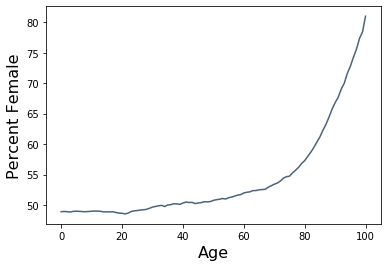

In [31]:
%matplotlib inline
counts_and_percents.plot('Age','Percent Female') # first argument = x axis, second argumnent = y-axis

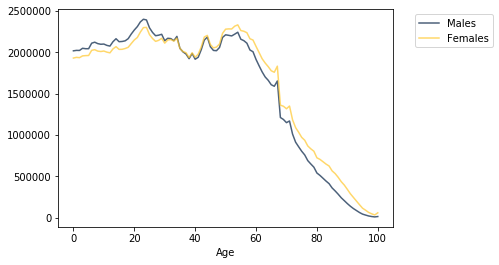

In [32]:
# look at males and females on the same plot, separately
# overlaid plots 
pop_2014.plot('Age') # just specify x axis, every other column will be displayed as values on the y-axis

In [36]:
# what's the sharp drop around 65?
pop_2014.where('Age',are.between(65,75))

Age,Males,Females
65,1607688,1776761
66,1589127,1758649
67,1653257,1832245
68,1211480,1361047
69,1187554,1347458
70,1149247,1317238
71,1169356,1350392
72,1010896,1183338
73,913008,1089183
74,857432,1032934


In [38]:
2014 - np.arange(67,73)

array([1947, 1946, 1945, 1944, 1943, 1942])

In [39]:
everyone = everyone.with_column(
    'Change', everyone.column(2) - everyone.column(1)
)

In [41]:
everyone.sort('Change', descending=True)

AGE,2010,2014,Change
67,"2,693,709","3,485,502",791793
64,"2,706,063","3,488,136",782073
66,"2,621,346","3,347,776",726430
65,"2,678,532","3,384,449",705917
71,"1,953,614","2,519,748",566134
34,"3,822,188","4,362,895",540707
23,"4,217,221","4,698,584",481363
59,"3,694,276","4,155,417",461141
24,"4,243,589","4,692,635",449046
70,"2,062,581","2,466,485",403904


# Growth Rates 

In [44]:
everyone.with_column(
    'Growth Rate', (everyone.column(2) / everyone.column(1)) ** (1/4) - 1
).sort('Growth Rate',descending=True)

AGE,2010,2014,Change,Growth Rate
100,"54,409","72,197",17788,0.0732777
93,"219,063","286,333",67270,0.069241
99,"32,178","41,828",9650,0.0677683
67,"2,693,709","3,485,502",791793,0.0665437
71,"1,953,614","2,519,748",566134,0.0656868
64,"2,706,063","3,488,136",782073,0.0655256
94,"170,775","218,655",47880,0.0637358
98,"47,037","60,185",13148,0.0635604
66,"2,621,346","3,347,776",726430,0.0630606
65,"2,678,532","3,384,449",705917,0.0602244


# Scatter Plots

In [46]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


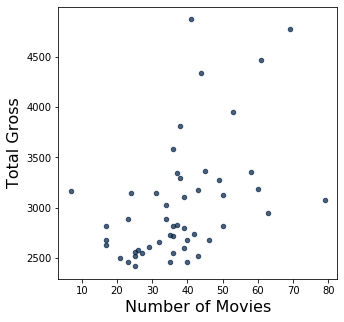

In [48]:
actors.scatter('Number of Movies','Total Gross') # positive association

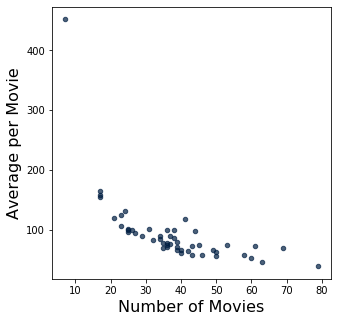

In [49]:
actors.scatter('Number of Movies', 'Average per Movie') # negative association

In [50]:
actors.where('Average per Movie',are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7
